##  Short Assignment 5

### Albeena Sofi

### The data presented is the estimated military expenditure (in USD and as a share of GDP) across countries over a period of time, between 1990 - 2016.

*Data source: [SIPRI (Stockholm International Peace Research Institute) Military Expenditure Database.](https://www.sipri.org/databases/milex)*


In [1]:
#importing the libraries for data analysis and visualization.
import pandas as pd
import io
import numpy as np
import random
import matplotlib as mpl
from matplotlib import pyplot as p
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Scatter, Figure, Layout
from plotly.offline import init_notebook_mode,iplot
#make plotly work with Jupyter notebook
init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
# To pull in the data file, use the pandas function read_excel, header parameter set to index 0.
df = pd.read_excel('Military Expenditure.xlsx', header=0)

In [3]:
df['Year'] = df['Year'].astype(str)

In [4]:
#The data is categorized by Year, starting from 2016 till 1990 for 170 countries. Data about Continent and Region is also listed.
df

,Country,Code,Expenditure,Expenditure as % of GDP,Year,Continent,Region
0,Afghanistan,AF,174.0,0.0100,2016,Asia & Oceania,South Asia
1,Albania,AL,147.0,0.0110,2016,Europe,Central Europe
2,Algeria,DZ,10217.0,0.0660,2016,Africa,North Africa
3,Angola,AO,2824.0,0.0360,2016,Africa,Sub-Saharan
4,Argentina,AR,5209.0,0.0095,2016,Americas,South America
5,Armenia,AM,431.0,0.0390,2016,Europe,Eastern Europe
6,Australia,AU,24617.0,0.0190,2016,Asia & Oceania,Oceania
7,Austria,AT,2862.0,0.0070,2016,Europe,Western Europe
8,Azerbaijan,AZ,1379.0,0.0400,2016,Europe,Eastern Europe
9,Bahrain,BH,1430.0,0.0470,2016,Middle East,Middle East


### **The military expenditure by countries (in the year 2016) in millions of USD**
***(current exchange rate)***

In [5]:
milex_2016 = df[:169] #Using the first 170 values, for countries in the year 2016

In [6]:
#Using choropleth maps from the Plotly library

#data object - specifying parameters for the map's data
data = dict(type = 'choropleth',
           colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],[0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
           reversescale = True,
           locations = milex_2016['Country'],
           locationmode = 'country names',
           z = milex_2016['Expenditure'],
           text = milex_2016['Country'],
           colorbar = {'title': 'Millions USD'})

#layout object - specifying parameters for the map's layout
layout = dict(title = '2016 Military Expenditure in millions of USD',
             geo = dict (showframe = False, projection = {'type': 'natural earth'}))
choromap = go.Figure(data=[data], layout=layout)

iplot(choromap,validate=False)

*The United States dominates the world in terms of military spending, followed by China.*

## The military expenditure by countries as a percentage of their GDP

In [7]:
data = dict(type = 'choropleth',
           colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],[0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
           reversescale = True,
           locations = milex_2016['Country'],
           locationmode = 'country names',
           z = milex_2016['Expenditure as % of GDP'],
           text = milex_2016['Country'],
           colorbar = {'title': 'Percentage of GDP'})
layout = dict(title = '2016 Military Expenditure as a percentage of GDP',
             geo = dict (showframe = False, projection = {'type': 'natural earth'}))
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap,validate=False)

*The military expenditure as a share of GDP, for comparison purposes, provides a more consistent data in contrast to the wide variation resulting from the analysis of military expenditure in USD. This is because each country's wealth differs. For example, in 2016, China's military expenditure exceeds that of Russia in terms of USD, but Russia spent more (5.3%) of its GDP on military as compared to China (1.9%). *

## Over the years - World military expenditure from 1990 - 2016

In [8]:
#Group data for different years as a sum of the total expenditure by countries.
milex_World = df.groupby(['Year']).sum()
#Bar chart using plotly
data = [Bar(x=milex_World.index, y=milex_World['Expenditure'])]

layout = Layout(title='Global Military Expenditure,1990-2016',
                xaxis=dict(title='Year',
                          ))
fig = Figure(data=data, layout=layout)

iplot(fig)

*The worldwide military expenditure is plotted for 170 countries over the years 1990 - 2016. Their is a declining trend from the year 1990 till about 1998 until the military spending reaches its peak in 2014. The current (2016) global military spending totals upto $1.645 trillion.*

In [9]:
milex_Region = df.groupby(['Region','Year'])['Expenditure','Expenditure as % of GDP'].sum()

Text(0.5,1,'Region wise military expenditure (1990 - 2016)')

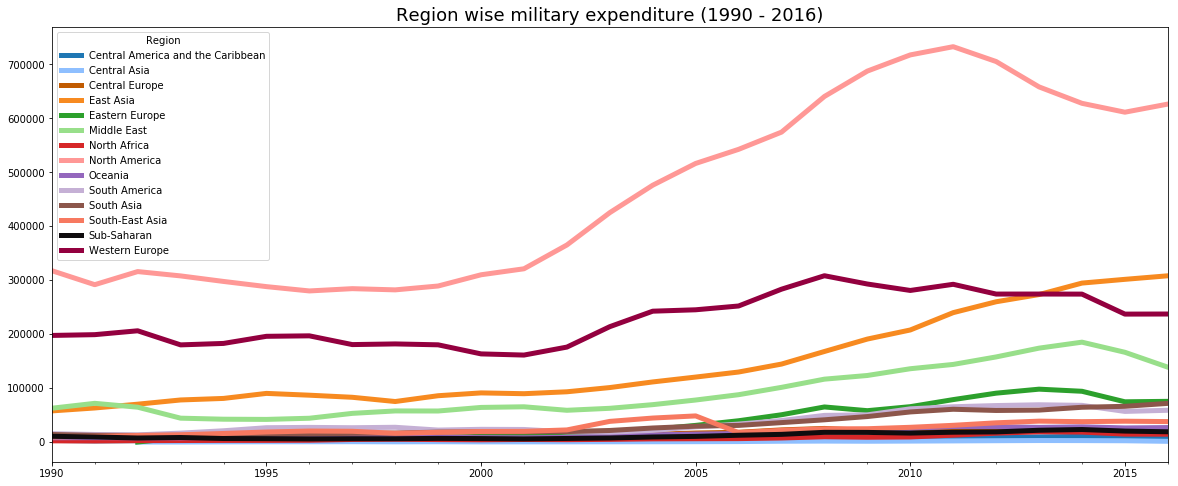

In [11]:
plot_milexRegion = milex_Region.unstack('Region').loc[:, 'Expenditure']
plot_milexRegion.index = pd.PeriodIndex(plot_milexRegion.index.tolist(), freq='A')
plot_milexRegion.plot(figsize=(20,8), linewidth=5, 
                      color=['#1f77b4', '#8ebfff', '#c15b01', '#f78a20', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#f77960', '#0f0c0e', '#93003f'])
p.title('Region wise military expenditure (1990 - 2016)', fontsize =18, ha='center')

*Region wise spending on military reflects that North America is in the lead, followed by Western Europe. The military spending by countries in East Asia seems to be growing and after 2013, it exceeds that of Western Europe.*

Text(0.5,1,'Region wise military expenditure as a share of GDP (1990 - 2016)')

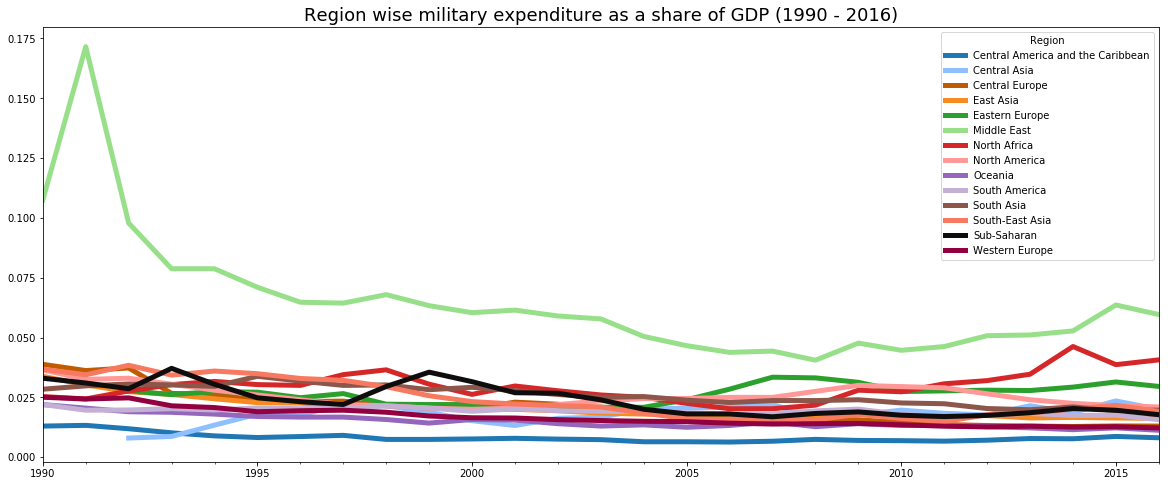

In [12]:
milex_Region1 = df.groupby(['Region','Year'])['Expenditure','Expenditure as % of GDP'].mean()
plot_milexRegion1 = milex_Region1.unstack('Region').loc[:, 'Expenditure as % of GDP']
plot_milexRegion1.index = pd.PeriodIndex(plot_milexRegion1.index.tolist(), freq='A')
plot_milexRegion1.plot(figsize=(20,8), linewidth=5, 
                      color=['#1f77b4', '#8ebfff', '#c15b01', '#f78a20', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#f77960', '#0f0c0e', '#93003f'])
p.title('Region wise military expenditure as a share of GDP (1990 - 2016)', fontsize =18, ha='center')

*Its interesting to note that the Middle East spent a huge percentage of its GDP on military between 1990-1992. This could possibly be a reflection of the Gulf War (1990-1991)*

## Looking at the world's 10 largest defence budgets

In [13]:
#Getting the ten largest expenditure values from the 170 countries in the year 2016
milex_Largest= milex_2016.sort_values(['Expenditure'], ascending=False).head(10).reset_index()
milex_Largest

,index,Country,Code,Expenditure,Expenditure as % of GDP,Year,Continent,Region
0,160,USA,US,611186.000000,0.032,2016,Americas,North America
1,30,"China, P.R.",CN,215176.000000,0.019,2016,Asia & Oceania,East Asia
2,161,USSR/Russia,RU,69245.309461,0.053,2016,Europe,Eastern Europe
3,127,Saudi Arabia,SA,63673.000000,0.104,2016,Middle East,Middle East
4,67,India,IN,55923.000000,0.025,2016,Asia & Oceania,South Asia
5,52,France,FR,55745.000000,0.022,2016,Europe,Western Europe
6,157,UK,GB,48253.000000,0.018,2016,Europe,Western Europe
7,75,Japan,JP,46126.000000,0.009,2016,Asia & Oceania,East Asia
8,56,Germany,DE,41067.000000,0.011,2016,Europe,Western Europe
9,80,"Korea, South",KR,36777.000000,0.026,2016,Asia & Oceania,East Asia


In [14]:
#Bar chart using plotly
data = [Bar(x=milex_Largest.Expenditure, y=milex_Largest.Country, orientation='h')]

layout = Layout(title="World's ten largest military spending (2016)",
                xaxis=dict(title='Expenditure in million USD',
                          ))
fig = Figure(data=data, layout=layout)

iplot(fig)

*The Unites States dominates the world military spending and the figure is disproportionately large. China and Russia are the second major powers after USA.*

In [15]:
#Using the same data, but analysis on the basis of expenditure as a share of GDP
milex_LargestGDP= milex_2016.sort_values(['Expenditure as % of GDP'], ascending=False).head(10).reset_index()
milex_LargestGDP
#Bar chart using plotly
data = [Bar(x=milex_LargestGDP['Expenditure as % of GDP'], y=milex_LargestGDP.Country, orientation='h')]

layout = Layout(title="World's ten largest military spending as a share of GDP (2016)",
                xaxis=dict(title='Percentage of GDP',
                          ))
fig = Figure(data=data, layout=layout)

iplot(fig)

*Quite in contrast to the previous bar chart, the military expenditure for the top ten countries when visualized as a percentage of GDP gives very different results. Oman seems to be spending the maximum share of GDP (16.7%) on its military, followed by Saudi Arabia (10.4%), and USA does not fall within the top ten in this dataset.*

A further analysis to this study would be looking at the dataset for the wars at different times in the past, and finiding a relation between the defense budget in the conflict zones to make possible conclusions.